- Smayan Kulkarni
- D100
- 60009230142
- D2-2

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import matplotlib.pyplot as plt
import numpy as np

2025-09-22 21:17:18.021155: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-22 21:17:18.028100: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758556038.036452   41986 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758556038.039270   41986 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1758556038.045622   41986 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [5]:

# 2. Define the Neural Network Architecture
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])
    return model



In [6]:

# 3. List of Optimizers to Compare
optimizers = {
    'SGD': keras.optimizers.SGD(),
    'SGD with Momentum': keras.optimizers.SGD(momentum=0.9),
    'Adagrad': keras.optimizers.Adagrad(),
    'RMSProp': keras.optimizers.RMSprop(),
    'AdaDelta': keras.optimizers.Adadelta(),
    'Adam': keras.optimizers.Adam(),
}



I0000 00:00:1758556039.639478   41986 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9244 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9


In [7]:
# Dictionary to store the history of each optimizer
history_dict = {}

# 4. Train the model with each optimizer
EPOCHS = 10
BATCH_SIZE = 128
results = []



In [ ]:
for name, optimizer in optimizers.items():
    print(f"\n--- Training with {name} ---")
    model = create_model()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,
                        batch_size=BATCH_SIZE,
                        epochs=EPOCHS,
                        validation_data=(x_test, y_test),
                        verbose=0) # Set to 1 to see epoch-by-epoch progress
    
    history_dict[name] = history
    
    # Evaluate and store the final results
    score = model.evaluate(x_test, y_test, verbose=0)
    results.append((name, score[0], score[1]))
    print(f"Completed: {name}, Test Loss: {score[0]:.4f}, Test Accuracy: {score[1]:.4f}")


--- Training with SGD ---


/home/smayan/Desktop/AI-ML-DS/AI-and-ML-Course/.conda/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1758556040.265939   42131 service.cc:152] XLA service 0x784e30006020 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758556040.265950   42131 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 SUPER, Compute Capability 8.9
2025-09-22 21:17:20.274176: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1758556040.295067   42131 cuda_dnn.cc:529] Loaded cuDNN version 91300
2025-09-22 21:17:21.266660: I external/local_xla/xla/stream_executor/cuda/subprocess_comp

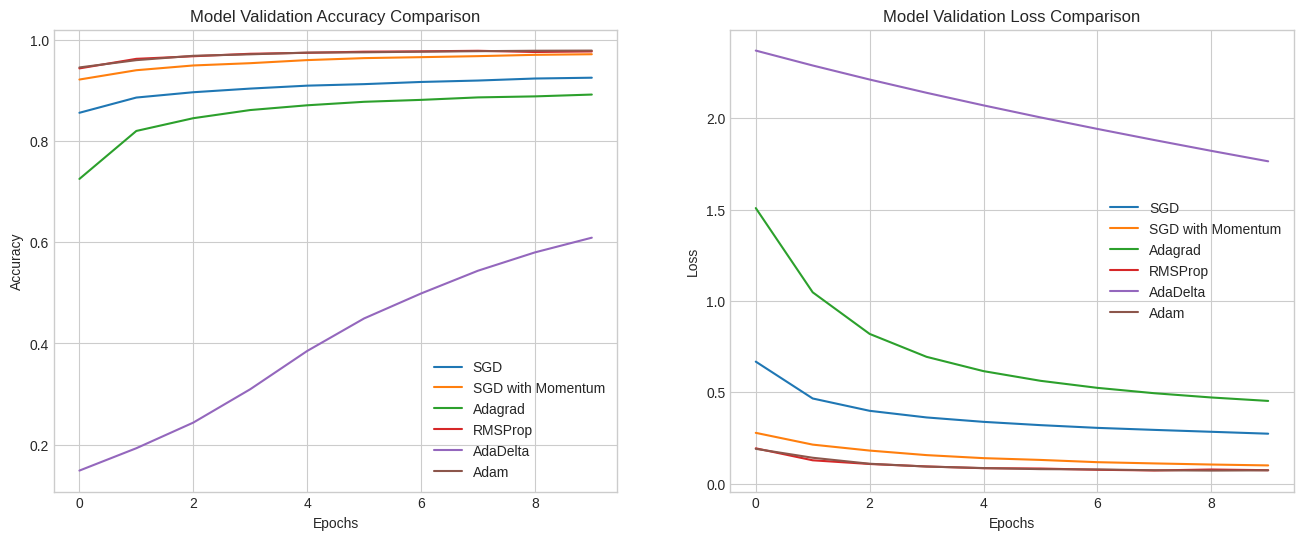

In [ ]:

# 5. Plot and Compare Results
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for name, history in history_dict.items():
    ax1.plot(history.history['val_accuracy'], label=name)
ax1.set_title('Model Validation Accuracy Comparison')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

for name, history in history_dict.items():
    ax2.plot(history.history['val_loss'], label=name)
ax2.set_title('Model Validation Loss Comparison')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

In [ ]:
print(history.history['val_accuracy'])
print(history.history['accuracy'])

[0.9452999830245972, 0.9596999883651733, 0.9682999849319458, 0.9711999893188477, 0.9746000170707703, 0.9751999974250793, 0.9764000177383423, 0.977400004863739, 0.9782999753952026, 0.978600025177002]
[0.8881166577339172, 0.9438166618347168, 0.9575833082199097, 0.9656333327293396, 0.9698333144187927, 0.9745833277702332, 0.9763000011444092, 0.9788166880607605, 0.9803500175476074, 0.9819999933242798]


In [ ]:
print("\n" + "="*65)
print(" " * 15 + "Optimizer Performance Comparison")
print("="*65)
print(f"| {'Optimizer':<20} | {'Final Test Loss':<20} | {'Final Test Accuracy':<20} |")
print(f"|{'-'*22}|{'-'*22}|{'-'*22}|")
for name, loss, acc in sorted(results, key=lambda x: x[2], reverse=True): # Sort by accuracy
    print(f"| {name:<20} | {loss:<20.4f} | {acc:<20.4f} |")
print("="*65)


               Optimizer Performance Comparison
| Optimizer            | Final Test Loss      | Final Test Accuracy  |
|----------------------|----------------------|----------------------|


NameError: name 'results' is not defined